In [10]:
import os 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import classification_report  
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [11]:
def LDAProb(dfLDA, dfSP):
    dfProbTopic = pd.read_csv(file_nameTopics)
    dfProbTopic['Date'] = pd.to_datetime(dfProbTopic['Date'])
    dfProbTopic['Date'] = pd.to_datetime(dfProbTopic.Date.map(lambda x: x.strftime('%Y-%m-%d')))
    
    dfLDA['Date'] = dfProbTopic['Date']
    
    df2 = dfLDA.merge(dfSP,on='Date')
    return (df2)


In [12]:

    
file_nameSP = os.path.join(os.getcwd(),'SP500_prepped.csv')
file_nameTopics = os.path.join(os.getcwd(), 'topics.csv')
file_nameLDA = os.path.join(os.getcwd(), 'ldaOut.csv')


dfSP = pd.read_csv(file_nameSP)
dfTopics = pd.read_csv(file_nameTopics)
dfLDA = pd.read_csv(file_nameLDA)


dfTopics['Date'] = pd.to_datetime(dfTopics['Date'])
dfSP['Date'] = pd.to_datetime(dfSP['Date'])

dfTopics['Date'] = pd.to_datetime(dfTopics.Date.map(lambda x: x.strftime('%Y-%m-%d')))

df2 = LDAProb(dfLDA, dfSP)

X = df2.iloc[:,0:25]
y = df2['label']

In [13]:
k = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, 
                                                    random_state=25)

classifier = KNeighborsClassifier(n_neighbors=k)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test) 

print(pd.crosstab(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

y_pred = classifier.predict(X)
print(pd.crosstab(y, y_pred))
#------------------------------------------
error = []

col_0    Bad  Good  Neutral
label                      
Bad       41     8      210
Good      28    13      189
Neutral   72    22      545
              precision    recall  f1-score   support

         Bad       0.29      0.16      0.20       259
        Good       0.30      0.06      0.10       230
     Neutral       0.58      0.85      0.69       639

    accuracy                           0.53      1128
   macro avg       0.39      0.36      0.33      1128
weighted avg       0.46      0.53      0.46      1128

col_0    Bad  Good  Neutral
label                      
Bad      192    29      668
Good     100    63      598
Neutral  186    55     1867


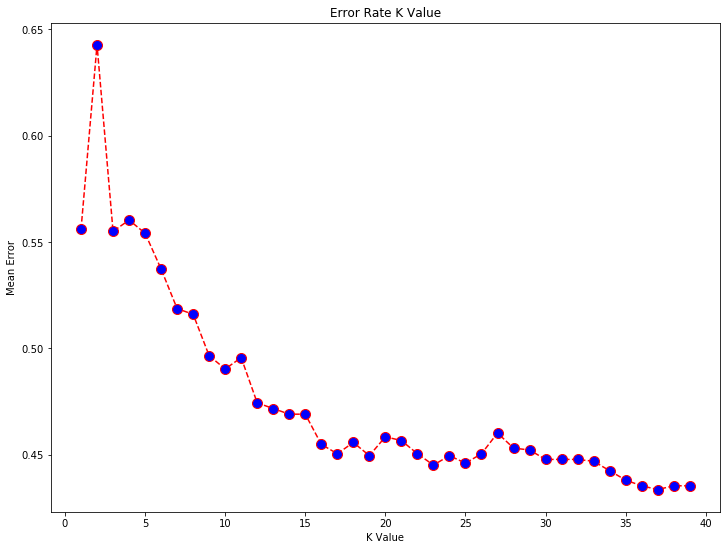

In [14]:
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 9))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
            markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

df2['pred'] = y_pred

In [15]:

def printLogStats(LogReg, y_test, y_pred, X_text, X, y):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import cross_val_score
    
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print('\n\n Confusion Matrix \n\n', confusion_matrix)
    
    precision_recall_statistics = classification_report(y_test, y_pred)
    print('\n\n classification report \n\n', precision_recall_statistics)
    
    model_score = LogReg.score(X_test, y_test)
    print('\n\n Model Score \n\n', model_score)
    
    cross_val = cross_val_score(LogisticRegression(), X, y, 
                                scoring='accuracy', cv=10)
    
    print('\n\n cross validation \n\n',  cross_val)
    print('\n cross validation mean: \n',  cross_val.mean())
    
    print('\n\n model coefficients: \n\n',  LogReg.coef_)


    
file_nameSP = os.path.join('SP500_prepped.csv')
file_nameTopics = os.path.join('topics.csv')
file_nameLDA = os.path.join('ldaOut.csv')


dfSP = pd.read_csv(file_nameSP)
dfTopics = pd.read_csv(file_nameTopics)
dfLDA = pd.read_csv(file_nameLDA)


dfTopics['Date'] = pd.to_datetime(dfTopics['Date'])
dfSP['Date'] = pd.to_datetime(dfSP['Date'])

dfTopics['Date'] = pd.to_datetime(dfTopics.Date.map(lambda x: x.strftime('%Y-%m-%d')))

df2 = LDAProb(dfLDA, dfSP)

X = df2.iloc[:,0:25]
y = df2['goodDay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, 
                                                    random_state=25)

# deploy logistic regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

printLogStats(LogReg, y_test, y_pred, X_test, X, y)



 Confusion Matrix 

 [[524  85]
 [450  69]]


 classification report 

               precision    recall  f1-score   support

       False       0.54      0.86      0.66       609
        True       0.45      0.13      0.21       519

    accuracy                           0.53      1128
   macro avg       0.49      0.50      0.43      1128
weighted avg       0.50      0.53      0.45      1128



 Model Score 

 0.525709219858156


 cross validation 

 [0.47340426 0.50797872 0.54787234 0.55053191 0.52925532 0.54255319
 0.52393617 0.54521277 0.56       0.52      ]

 cross validation mean: 
 0.5300744680851063


 model coefficients: 

 [[ 0.1888887  -0.79751162 -0.06576827 -0.54018807  0.75145472  0.29221517
  -0.38156679 -0.26897138 -0.12839778 -0.16338223  0.83272706  0.16802487
  -0.60777345  0.31147341  0.23481454 -0.2997915   0.47694788  0.14212698
   0.10155975 -0.25039859  0.35548503 -0.30504398 -0.08830634 -0.20488808
   0.22018469]]
